### Exploratory Data Analysis - Retail Store

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
retail_store = pd.read_csv('datasets/SampleSuperstore.csv')

In [3]:
retail_store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
#Caculating Cost and profit percentage.
retail_store['Cost'] = retail_store['Sales'] - retail_store['Profit'] #cost calculation
#for calculating profits
retail_store['Profit %'] = (retail_store['Profit'] / retail_store['Cost']) * 100 
#changing the discount value into percentage value.
retail_store['Discount %'] = retail_store['Discount'] * 100

In [7]:
retail_store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %,Discount %
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464,19.047619,0.0
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580,42.857143,0.0
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.7486,88.679245,0.0
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085,-28.571429,45.0
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,19.8516,12.676056,20.0


In [58]:
retail_store['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [4]:
retail_store.shape

(9994, 13)

In [5]:
retail_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
retail_store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
retail_store['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

Co-relation is statistical techniques which is used to show the how two varaible are related. We will use co-relation matrix to find pair-wise co-relation between numerical columns.

In [8]:
#co-relation matrix 
corr_matrix = retail_store.corr()
print(corr_matrix)

             Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023854  0.012761  0.058443 -0.029961
Sales          -0.023854  1.000000  0.200795 -0.028190  0.479064
Quantity        0.012761  0.200795  1.000000  0.008623  0.066253
Discount        0.058443 -0.028190  0.008623  1.000000 -0.219487
Profit         -0.029961  0.479064  0.066253 -0.219487  1.000000


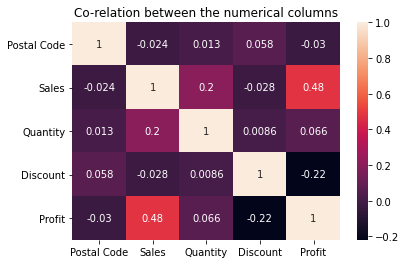

In [27]:
#visualizing it to better understand.
# ax = sns.heatmap(corr_matrix, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),square=True)
sns.heatmap(corr_matrix, annot=True)
plt.title('Co-relation between the numerical columns')
plt.show()

Lights colour show the postive co-relation while the dark colours shows the negtive co-relation.

##### Type of shipping mode: 

In [9]:
for i in retail_store['Ship Mode'].unique():
    print(i)

Second Class
Standard Class
First Class
Same Day


In [10]:
retail_store['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

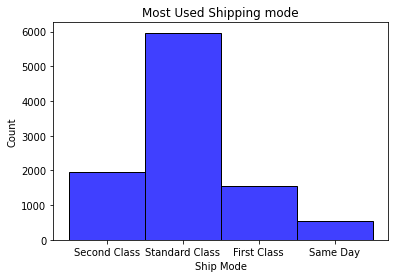

In [11]:
sns.histplot(x = retail_store['Ship Mode'], color = 'b')
plt.title("Most Used Shipping mode")
plt.show()

##### State which have the higest the profits and losses

In [24]:
#higest sales in states
higest_profit_state = retail_store.groupby('State').Profit.sum()
higest_profit_state.sort_values(ascending= False)

State
California              76381.3871
New York                74038.5486
Washington              33402.6517
Michigan                24463.1876
Virginia                18597.9504
Indiana                 18382.9363
Georgia                 16250.0433
Kentucky                11199.6966
Minnesota               10823.1874
Delaware                 9977.3748
New Jersey               9772.9138
Wisconsin                8401.8004
Rhode Island             7285.6293
Maryland                 7031.1788
Massachusetts            6785.5016
Missouri                 6436.2105
Alabama                  5786.8253
Oklahoma                 4853.9560
Arkansas                 4008.6871
Connecticut              3511.4918
Nevada                   3316.7659
Mississippi              3172.9762
Utah                     2546.5335
Vermont                  2244.9783
Louisiana                2196.1023
Nebraska                 2037.0942
Montana                  1833.3285
South Carolina           1769.0566
New Hampshire 

In [33]:
discount = retail_store.groupby('Discount').Sales.mean()
discount.sort_values(ascending=False)

Discount
0.50    892.705152
0.10    578.397351
0.40    565.134874
0.32    536.794770
0.15    529.971567
0.45    498.634000
0.30    454.742974
0.00    226.742074
0.20    209.076940
0.70     97.177708
0.80     56.545853
0.60     48.150000
Name: Sales, dtype: float64

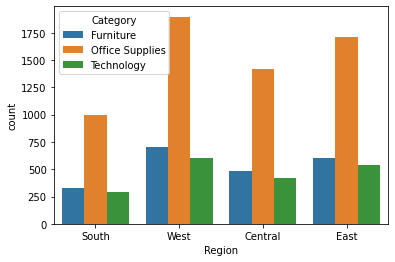

In [59]:
sns.countplot(x= retail_store['Region'], hue= retail_store['Category'])
plt.show()

<AxesSubplot:xlabel='Sales', ylabel='Profit %'>

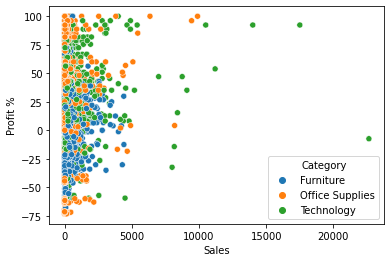

In [66]:
sns.scatterplot(x= retail_store['Sales'], y= retail_store['Profit %'], hue=retail_store['Category'])

                      Profit        Sales
Category                                 
Furniture         18451.2728  741999.7953
Office Supplies  122490.8008  719047.0320
Technology       145454.9481  836154.0330


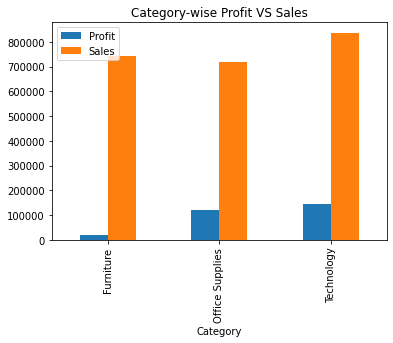

In [13]:
cate_prof_sal = retail_store.groupby('Category')['Profit', 'Sales'].agg('sum')
print(cate_prof_sal)
cate_prof_sal.plot.bar()
plt.legend(loc='upper left')
plt.title('Category-wise Profit VS Sales')
plt.show()

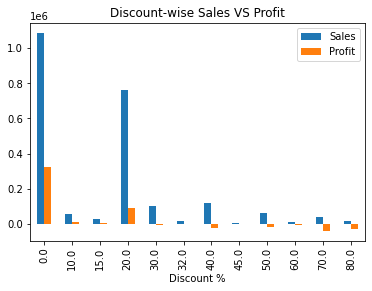

In [15]:
disc_sale = retail_store.groupby('Discount %')['Sales', 'Profit'].agg('sum')
disc_sale.plot.bar()
plt.title('Discount-wise Sales VS Profit')
plt.show()

In [20]:
for i in retail_store['Sub-Category'].unique():
    print(i)

Bookcases
Chairs
Labels
Tables
Storage
Furnishings
Art
Phones
Binders
Appliances
Paper
Accessories
Envelopes
Fasteners
Supplies
Machines
Copiers


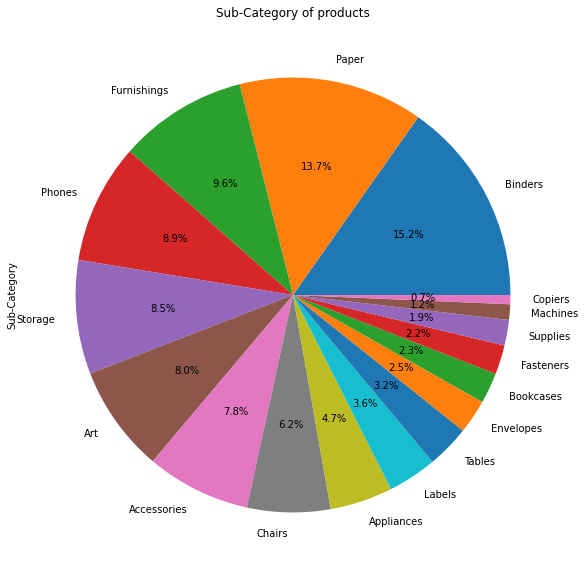

In [25]:
plt.figure(figsize=(10,10))
pie_chart = retail_store['Sub-Category'].value_counts()
pie_chart.plot.pie(autopct='%1.1f%%')
plt.title("Sub-Category of products")
plt.show()